In [2]:
import os
import pandas as pd
import ast
import numpy as np


In [3]:
folder_path = r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\log_map\Mistralton City'
files = os.listdir(folder_path)

In [4]:
data_frames = []  # 存储每个文件的 DataFrame

for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith('.csv'):  # 假设文件是以.csv结尾的
        df = pd.read_csv(file_path, delimiter=';')  # 读取文件为 DataFrame
        data_frames.append(df)  # 将 DataFrame 添加到列表中

# 合并所有 DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)

In [5]:
merged_df

,game_status,enemy_status,state_dict,memory_coords,memory_battle_status,timestamp
0,{'return_status': 0},{'enemy_count': 0},{},"{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686329e+09
1,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686329e+09
2,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686329e+09
3,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686329e+09
4,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686329e+09
...,...,...,...,...,...,...
13727,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'Mistralton City Ch. 3\n', 'money'...","{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686330e+09
13728,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'Mistralton City Ch. 3\n', 'money'...","{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686330e+09
13729,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'Mistralton City Ch. 3\n', 'money'...","{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686330e+09
13730,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'Mistralton City Ch. 3\n', 'money'...","{'x_coords': 108, 'y_coords': 305, 'map_number...","{'player_info_not_sure_address': 3937488048, '...",1.686330e+09


In [6]:
df=merged_df.copy()

In [7]:
# 将字符串转换为字典格式
df['memory_coords'] = df['memory_coords'].apply(ast.literal_eval)
df['game_status'] = df['game_status'].apply(ast.literal_eval)

# 提取 "x_coords"、"y_coords" 和 "map_number" 到新列
df['x_coords'] = df['memory_coords'].apply(lambda x: x.get('x_coords'))
df['y_coords'] = df['memory_coords'].apply(lambda x: x.get('y_coords'))
df['map_number'] = df['memory_coords'].apply(lambda x: x.get('map_number'))
df['face_dir']=df['memory_coords'].apply(lambda x: x.get('face_dir'))
df['transport']=df['memory_coords'].apply(lambda x: x.get('transport'))



In [8]:
f = df.drop(['memory_coords'], axis=1)
df = df.drop(['game_status', 'enemy_status', 'state_dict', 'memory_battle_status','face_dir','transport'], axis=1)


In [9]:
df = df.drop(['timestamp', 'memory_coords'], axis=1)

In [10]:
# 拆分 "map_number" 列
df[['map_num_1', 'map_num_2', 'map_num_3']] = pd.DataFrame(df['map_number'].tolist())

# 删除原始的 "map_number" 列
#df = df.drop(['map_number'], axis=1)


In [11]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,x_coords,y_coords,map_number,map_num_1,map_num_2,map_num_3
0,108,305,"(2, 0, 107)",2,0,107
1,109,305,"(2, 0, 107)",2,0,107
2,110,305,"(2, 0, 107)",2,0,107
3,111,305,"(2, 0, 107)",2,0,107
4,111,304,"(2, 0, 107)",2,0,107
...,...,...,...,...,...,...
878,7,17,"(2, 0, 109)",2,0,109
879,7,18,"(2, 0, 109)",2,0,109
880,7,19,"(2, 0, 109)",2,0,109
881,7,20,"(2, 0, 109)",2,0,109


In [12]:
unique_values = df['map_number'].unique()
print(unique_values)

[(2, 0, 107) (2, 1, 81) (2, 1, 82) (2, 1, 83) (2, 0, 109) (2, 1, 84)
 (2, 1, 85) (2, 1, 86)]


In [13]:
df = df.drop(df[df['map_number'] == (2, 0, 109)].index) # 不要医院地图

In [14]:
desired_values = [(2, 0, 107), (2, 1, 81)]#只要大地图的
df = df[df['map_number'].isin(desired_values)]

In [15]:
# 计算数值列的统计信息
numeric_cols = ['x_coords', 'y_coords', 'map_num_1', 'map_num_2', 'map_num_3']
statistics = df[numeric_cols].describe()
print(statistics)


         x_coords    y_coords  map_num_1   map_num_2   map_num_3
count  533.000000  533.000000      533.0  533.000000  533.000000
mean   109.926829  275.075047        2.0    0.617261   90.951220
std      5.798974   24.709021        0.0    0.486512   12.649314
min     99.000000  227.000000        2.0    0.000000   81.000000
25%    105.000000  254.000000        2.0    0.000000   81.000000
50%    111.000000  280.000000        2.0    1.000000   81.000000
75%    115.000000  297.000000        2.0    1.000000  107.000000
max    121.000000  311.000000        2.0    1.000000  107.000000


In [ ]:
# df['new_x'] = df.apply(lambda row: row['x_coords'] -21 if row['map_num_3'] == 74 else row['x_coords'], axis=1)
# df['new_y'] = df.apply(lambda row: row['y_coords'] -16 if row['map_num_3'] == 74 else row['y_coords'], axis=1)

df['new_x']=df['x_coords']
df['new_y'] = df['y_coords']
df
# desired_values = (1,4,74)  # 指定要筛选的值

# filtered_df = df[(df['map_num_1'] == desired_values[0]) & (df['map_num_2'] == desired_values[1])& (df['map_num_3'] == desired_values[2])]

# selected_columns = ['map_num_1', 'map_num_2', 'map_num_3']
# # filtered_df = df[selected_columns]
# # filtered_df
# filtered_df

In [ ]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots(figsize=(20, 20))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df['new_x'], df['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()


In [ ]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 1

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("VERDANTURF TOWN coordinates.xlsx")

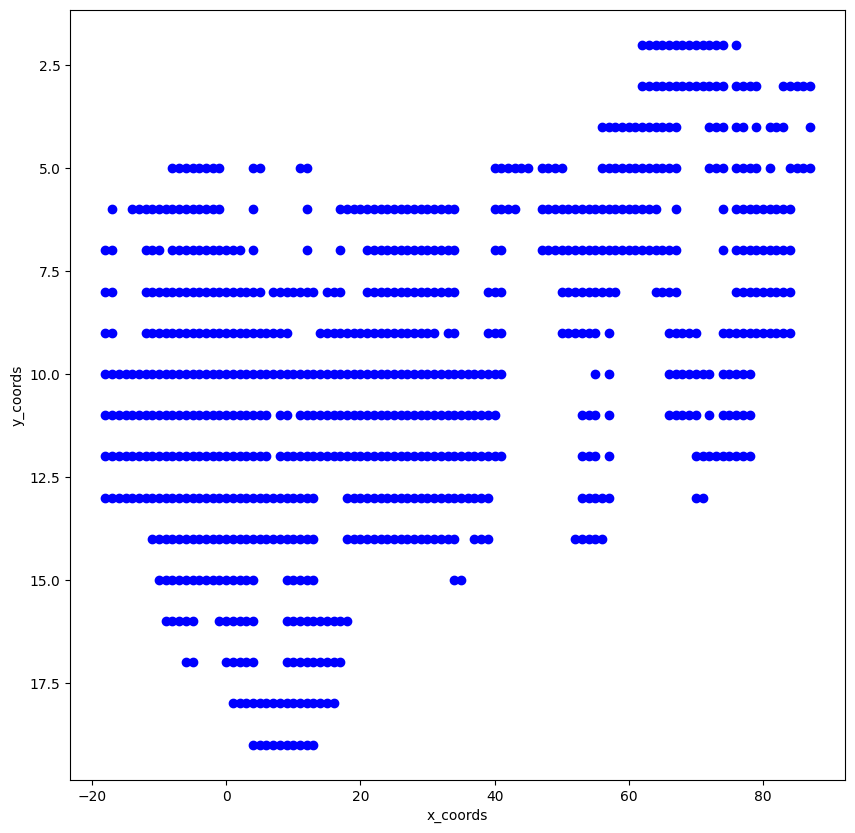

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR TOWN coordinates.xlsx", index_col=0)

# 反转y轴
#df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values == 1)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 画出散点图
plt.scatter(x_coords, y_coords, color='b')
# y轴反转
plt.gca().invert_yaxis()
# 设定坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


In [2]:
#df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR TOWN coordinates.xlsx", index_col=0)
#df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\SOOTOPOLIS_CITY coordinates.xlsx", index_col=0)
#df=pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\BATTLE FRONTIER coordinates.xlsx", index_col=0)
df=pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR TOWN coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df




,index,-18,-17,-16,-15,-14,-13,-12,-11,-10,...,78,79,80,81,82,83,84,85,86,87
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0
4,6,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
5,7,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
6,8,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
7,9,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
8,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,2,-18,NaN
1,3,-18,NaN
2,4,-18,NaN
3,5,-18,NaN
4,6,-18,NaN
...,...,...,...
1903,15,87,NaN
1904,16,87,NaN
1905,17,87,NaN
1906,18,87,NaN


In [4]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted


,y_coords,x_coords,mark
0,2,-18,NaN
1,3,-18,NaN
2,4,-18,NaN
3,5,-18,NaN
4,6,-18,NaN
...,...,...,...
1903,15,87,NaN
1904,16,87,NaN
1905,17,87,NaN
1906,18,87,NaN


In [5]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
5,7,-18,1.0
6,8,-18,1.0
7,9,-18,1.0
8,10,-18,1.0
9,11,-18,1.0
...,...,...,...
1873,3,86,1.0
1875,5,86,1.0
1891,3,87,1.0
1892,4,87,1.0


In [6]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0           7      -18     1
1           8      -18     1
2           9      -18     1
3          10      -18     1
4          11      -18     1
..        ...      ...   ...
850         3       86     1
851         5       86     1
852         3       87     1
853         4       87     1
854         5       87     1

[855 rows x 3 columns]


In [7]:
df_melted.to_csv(r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR_TOWN_coords_tracking.csv')